# Day 14: Reindeer Olympics

In [1]:
import re
from itertools import accumulate, chain, cycle, repeat

import numpy as np
import seaborn as sns

from tools import loader, parsers

DATA = parsers.lines(loader.get(2015, 14))
TIME = 2503

Using Numpy for this is probably an overkill, but I already use it extensively in AoC, so why not?
We don't have to store all reindeer positions for every second for part 1, but it will be necessary later.
Using np.fromiter conveniently allows us to combine it with itertools, which cycles endlessly between moving N times, then resting N times.

In [2]:
reindeer = [tuple(map(int, re.findall(r'(\d+)', line))) for line in DATA]
results = np.zeros((len(reindeer), TIME), dtype=int)
for i, (speed, travel_time, rest_time) in enumerate(reindeer):
    fly = cycle(chain(repeat(speed, travel_time),  repeat(0, rest_time)))
    results[i] = np.fromiter(accumulate(fly), dtype=int, count=TIME)

print(max(results[:, -1]))

2660


For part 2 we can leverage Numpy's nifty windowing, but in this case we don't even need it: simple transposing will suffice, allowing us to iterate over the results for all reindeer for each second.


The only gotcha here is that there can be more than one maximum value (draw condition), so we can't simply use np.argmax - instead, we need all indices of maximum values in a row.

In [3]:
scores = np.zeros((len(reindeer)), dtype=int)
for window in results.T:
    scores[np.argwhere(window == max(window))] += 1

print(max(scores))

1256


[Text(0.5, 0, 'Time, s'), Text(0, 0.5, 'Distance, m')]

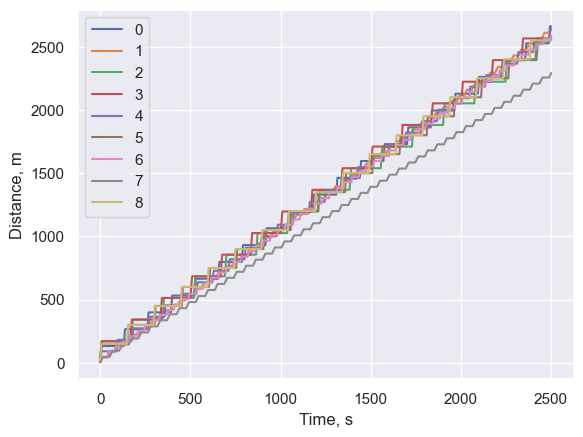

In [4]:
sns.set_theme()
chart = sns.lineplot(data=results.T, dashes=False)
chart.set(xlabel='Time, s', ylabel='Distance, m')